<a href="https://colab.research.google.com/github/jdemonasterio/econometria1905/blob/master/Tercer_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About


---

Curso de Econometria en Exactas (Abril 2019): 

Pagina del curso : https://econometriaenexactas.weebly.com/

Autores: Juan Mateo de Monasterio , Violeta Roizman 

Fecha: Mayo 2019

Trabajo Practico Numero 3: [Link](https://econometriaenexactas.weebly.com/uploads/1/2/0/7/120744889/tp3_econometr%C3%ADa.pdf)

Material teórico: [Link](https://econometriaenexactas.weebly.com/uploads/1/2/0/7/120744889/variablesinstumentales.pdf)



![Variables instrumentales](https://www.researchgate.net/profile/Stephen_Morris18/publication/284187570/figure/fig2/AS:614064002695169@1523415675963/Illustration-of-an-instrumental-variables-approach.png)

# Comandos útiles de R

Notas extraidas de: [Link](https://econometriaenexactas.weebly.com/uploads/1/2/0/7/120744889/ayuda_tp_3_exactas.pdf)

- Eliminar  las  filas  con  observaciones  faltantes,  utilizar  el comando 
`na.omit(data)`
- Estimar un modelo mediante el método de $MCO$:  comando `lm(y∼x)`

### Paquete `AER`

Nos permite realizar modelos utlizando variables instrumentales. 
Instalar el paquete con `install.packages("AER")`

La  función `ivreg` del paquete está hecha para estimar un modelo utilizando variables instrumentales.  Se utliza del siguiente modo:
  `ivfit <- ivreg(y∼x1 + x2 |∼z1 + z2, data)` donde `z1` y `z2` son los instrumentos. 
  
Para testear el instrumento, utilizar `summary(iv.fit, df=Inf , diagnostics=TRUE)`

### Paquete `gmm`

Nos permite  realizar estimaciones  a  través  del  Método  Generalizado  de  Momentos ($GMM$). 
Instalar el paquete con `install.packages("gmm")`.


La  función `gmm` del paquete está hecha para estimar un modelo utilizando $GMM$.  Se utliza del siguiente modo:
  `gmm(y∼x1 + x2, x=c(z1,z2), type="twoStep",vcov="iid")` 
  
 ### Argumentos de la función
  - `x` (vector): los instrumentos
  - `type` (char): el tipo de metodo a estimar
  - `vcov` (char): propiedades del vector de instrumentos. Utilizar `"HAC"` para tener una estimación robusta.
  

La función `summary` provee el test de sobre-identificación.
 


# Configurar el Ambiente
Aca vamos a poner todos los pasos para poder tener las librerias de R y la data (tablas, etc.) que querramos reutilizar dentro de esta Colab. 

In [0]:
# Veamos donde estamos parados en esta computadora. Despues de todo, Colab corre sobre una computadora virtual!
# Podemos lanzar comandos tradicionales Linux, solo hace falta poner como primer caracter de la celda.  
system('pwd', intern=TRUE) # es casi el mismo output que `getwd()`

[1] "/content"

In [0]:
WORKING_DIR <- getwd() # guardemos esto en una variable, lo vamos a usar despues

# Pongamosle nombre a las carpetas carpeta donde vamos a guardar lo necesario para la ejecucion posterior. i.e. datosde entrada o salida, imagenes etc
DATA_DIR <- sprintf("%s/data", WORKING_DIR)
IMG_DIR <- sprintf("%s/images", WORKING_DIR)

cat(WORKING_DIR, DATA_DIR, IMG_DIR) # esta ultima linea es solo para mostrar el "valor" de estas variables

/content /content/data /content/images

In [0]:
# creamos las carpetas necesarias
system(paste('mkdir ', DATA_DIR), intern=TRUE)
system(paste('mkdir ', IMG_DIR), intern=TRUE)

character(0)

character(0)

## Instalamos los paquetes que utliicemos
Esto se debe hacer c/vez que se quiera correr "desde 0" esta Colab (por ejemplo cuando cerramos y abrimos esta pagina) o cuando se restartea esta maquina (creo que son dias u horas). Pero se corre una sola vez y luego queda vivo para usar mientras vayamos editando o trabjando.

In [0]:
install.packages("googledrive") # para poder bajar archivos directo de google Drive install.packages("corrplot") # para plotear la matriz de correlacion
install.packages("httpuv") # lo necesita gdrive para autenticarse  de forma basica(saber si tenes permisos o no para bajar archivos, cuando se corre este script)
install.packages("stargazer")  # paquete para tener una salida estética de las regresiones
install.packages("car")  # paquete para realizar test de hipótesis lineales
install.packages("AER")  # paquete para realizar análisis de variables instrumentales https://rdrr.io/cran/AER
install.packages("gmm")  # paquete para realizar estimaciones via metodo generador de momentos
install.packages("plotly") # para poder dibujar visualizaciones interactivas


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘promises’, ‘later’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xtable’, ‘sourcetools’, ‘shiny’, ‘htmlwidgets’, ‘hexbin’, ‘cros

## Cargamos / "loadeamos" los paquetes a utilizar


In [0]:
XVZlibrary(gmm)
library(stargazer)
library(car)
library(googledrive)
library(readr)
library(ggplot2)
library(plotly) 
library("knitr") # maneja configuraciones del ambiente de R como tamaño de plots

Loading required package: car
Loading required package: carData
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



### Configurar Google Drive



In [0]:
# Segun dicen los creadores de la libreria de googleDrive, debemos correr esto
# para poder levantar archivos que tengan permisos libres de lectura: 
# https://github.com/tidyverse/googledrive/issues/225#issuecomment-406304209 

drive_auth_config(active = FALSE)

googledrive auth state: inactive
oauth app: tidyverse
API key: set
token: not loaded

In [0]:
# Es muy importante que este archivo tenga permisos de drive para poder ser 
# abierto o visto por cualquiera en la web
tp_csv_drive_url <- "https://drive.google.com/file/d/1n3_N0_1XT7gNTpAqY8dLqOOw82btZ-KD"

In [0]:
drive_id <-  gsub("^.*/", "", tp_csv_drive_url)
# es la  parte alafanumerica del final, identificador unico global para nuestro 
# archivo, en todo GDrive
drive_id

[1] "1n3_N0_1XT7gNTpAqY8dLqOOw82btZ-KD"

In [0]:
dribble_metadata <- drive_get(id=drive_id) 
# en el contexto de la libreria `googledrive` un dribble es una representacion 
# en R de un archivo que existe en Gdrive
dribble_metadata

name                                        
1 tp3_econometria_variables_instrumentales.csv
  id                               
1 1n3_N0_1XT7gNTpAqY8dLqOOw82btZ-KD
  drive_resource                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [0]:
file_name <- dribble_metadata[1]
input_file_path <-sprintf("%s/%s", DATA_DIR, file_name)
input_file_path

[1] "/content/data/tp3_econometria_variables_instrumentales.csv"

In [0]:
 # bajamos el archivo al servidor
drive_download(dribble_metadata, path=input_file_path, overwrite=TRUE, verbose=TRUE)

File downloaded:
  * tp3_econometria_variables_instrumentales.csv
Saved locally as:
  * /content/data/tp3_econometria_variables_instrumentales.csv


# Comienzo TP

## Contexto de la problemática

Hasta hace unos años se pensaba que el ambiente intrauterino era capaz de proteger a lo shumanos en gestación, de factores perjudiciales del entorno. Sin embargo, investigaciones más recientes señalan lo contrario: los factores ambientales pueden incidir fuertemente en la salud del feto. 

En este trabajo vamos a analizar la relación entre peso al nacer, variable comúnmente usada como medida de la salud durante la gestación, y el consumo de cigarrillo por parte de la madre durante ese período  [^1]. 

## Datos
Utilizaremos esta [base de datos](https://drive.google.com/file/d/1n3_N0_1XT7gNTpAqY8dLqOOw82btZ-K) , la cual contiene datos sobre 1388 nacidos en Estados Unidos en 1988, y datos de sus madres.

Las variables incluidas son: 

- `lfaminc`: Logaritmo del ingreso familiar
-  `cigtax`:  Impuesto al cigarrillo en el estado de residencia
-  `cigprice`: Precio del paquete de cigarrillo en el estado de residencia
- `lbwght` Logaritmo del peso al nacer
- `fatheduc`: Años de educación del padre
- `motheduc:` Años de educación de la madre
- `parity`:  Orden de nacimiento
- `male`: `1`si es hombre, `0` si es mujer.
- `white`: 1 si es blanco, 0 en otro caso.
- `packs`: Paquetes de cigarrillos fumados por día durante el embarazo


---
[^1]:  [Link a la publicación](https://www.nber.org/papers/w14196) 

### Definimos algunas variables globales y configuraciones,
y que vamos a reutilizar luego 

In [0]:
knitr::opts_chunk$set(echo = TRUE, Encoding="UTF-8", fig.width=8, fig.height=5)

In [0]:
# Funcion para plotear scatters rapidamente 
plot_scatter <- function(data,col1, col2,
                        col1_label=NULL, col2_label=NULL) {
 
  title <- sprintf("Scatter: %s vs. %s", col1, col2)

  if(is.null(col1_label)){
    col1_label <- col1
  }

  if(is.null(col2_label)){
    col2_label <- col2
  }

  plot(data[[col1]], data[[col2]], 
     main=title,
   xlab=col1_label, ylab=col2_label, pch=19) 
}

In [0]:
color_vector <-  c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
                   '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
                   '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                   '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', 
                   '#ffffff', '#000000')


In [0]:
iv_data = read_csv(input_file_path)
iv_data = na.omit(iv_data)

Parsed with column specification:
cols(
  cigtax = col_double(),
  cigprice = col_double(),
  fatheduc = col_double(),
  motheduc = col_double(),
  parity = col_double(),
  male = col_double(),
  white = col_double(),
  lbwght = col_double(),
  packs = col_double(),
  lfaminc = col_double()
)


# Pregunta 1 - Estadistica Descriptiva

```
Presente y comente un cuadro con estadística descriptiva de las variables que utilice (no presente estadísticos irrelevantes o que no planee comentar).
```

La variable respuesta es el logaritmo del peso del bebé al nacer (`lbwght`) y tenemos que 


# Respuesta 1


Como iniciación con los datos, comenzamos con ver que datos tenemos, mirando al menos los valores de estos enl las priemras filas, y tambien viendo el tipo de datos que tenemos, mas los estadísticos más basicos de estos.

In [0]:
str(iv_data) 

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1191 obs. of  10 variables:
 $ cigtax  : num  16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 16.5 ...
 $ cigprice: num  122 122 122 122 122 ...
 $ fatheduc: num  12 6 12 14 12 16 12 12 16 12 ...
 $ motheduc: num  12 12 12 12 14 14 14 17 18 16 ...
 $ parity  : num  1 2 2 2 6 2 2 2 2 2 ...
 $ male    : num  1 1 1 1 1 0 0 0 0 1 ...
 $ white   : num  1 0 0 1 0 1 0 1 1 0 ...
 $ lbwght  : num  4.69 4.89 4.84 4.9 4.77 ...
 $ packs   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ lfaminc : num  2.6 2.01 2.74 3.31 2.01 ...
 - attr(*, "na.action")= 'omit' Named int  3 13 18 20 27 30 64 65 77 89 ...
  ..- attr(*, "names")= chr  "3" "13" "18" "20" ...


In [0]:
summary(iv_data)

     cigtax        cigprice        fatheduc        motheduc         parity     
 Min.   : 2.0   Min.   :103.8   Min.   : 1.00   Min.   : 2.00   Min.   :1.000  
 1st Qu.:15.0   1st Qu.:122.8   1st Qu.:12.00   1st Qu.:12.00   1st Qu.:1.000  
 Median :20.0   Median :130.8   Median :12.00   Median :12.00   Median :1.000  
 Mean   :19.6   Mean   :130.7   Mean   :13.19   Mean   :13.13   Mean   :1.614  
 3rd Qu.:26.0   3rd Qu.:137.0   3rd Qu.:16.00   3rd Qu.:15.00   3rd Qu.:2.000  
 Max.   :38.0   Max.   :152.5   Max.   :18.00   Max.   :18.00   Max.   :6.000  
      male            white            lbwght          packs        
 Min.   :0.0000   Min.   :0.0000   Min.   :3.135   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:4.682   1st Qu.:0.00000  
 Median :1.0000   Median :1.0000   Median :4.787   Median :0.00000  
 Mean   :0.5189   Mean   :0.8438   Mean   :4.768   Mean   :0.08846  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:4.883   3rd Qu.:0.00000  
 Max.   :1.0000   Max.   :

A primera vista ya nos encontramos con algunas situaciones, como mínimo, destacables en los datos. 

Vemos que por las columnas de educacion (`fatheduc` y `motheduc`), tenemos un rango de 2 a 18 donde el promedio y la mediana estan alrededor de `12`y `13`. No sabemos exactamente a que corresponden estos valores, si a años equivalentes de estudios, o tal vez a alguna noción categorica de estudio, como así también podrían ser datos estrictamente ordinales de nivel alcanzado.

Algo similar ocurre con la variable dependiente `lbwght`. En principio contamos con que esta variable es el logaritmo del peso al nacer, posiblmente en unidades de libras. Pero si consideramos que el rango de esta variable está contenido dentro de  `[3.1, 5.61]`, entonces tenemos, que, en libras, los recién nacidos de esta base están entre  $ exp(3.1) =  22.19 $ y  $ exp(5.61) = 273 $ libras, para toda la muestra.


Explorando un poco mas, los datos dejan algunas dudas sobre la mesa, como sobre que relación existe entre los paquetes  (`packs`) consumidos durante el embarazo y el precio de los cigarros. Vemos que existen varios casos para los cuales no se consumieron paquetes, pero existe un precio para los cigarros (consumidos?). Algo similar ocurre con los ingresos familiares, donde podemos tener ingresos menores a `1`, pero como no se aclara la unidad de estos, no queda claro si es más un error en la data. 

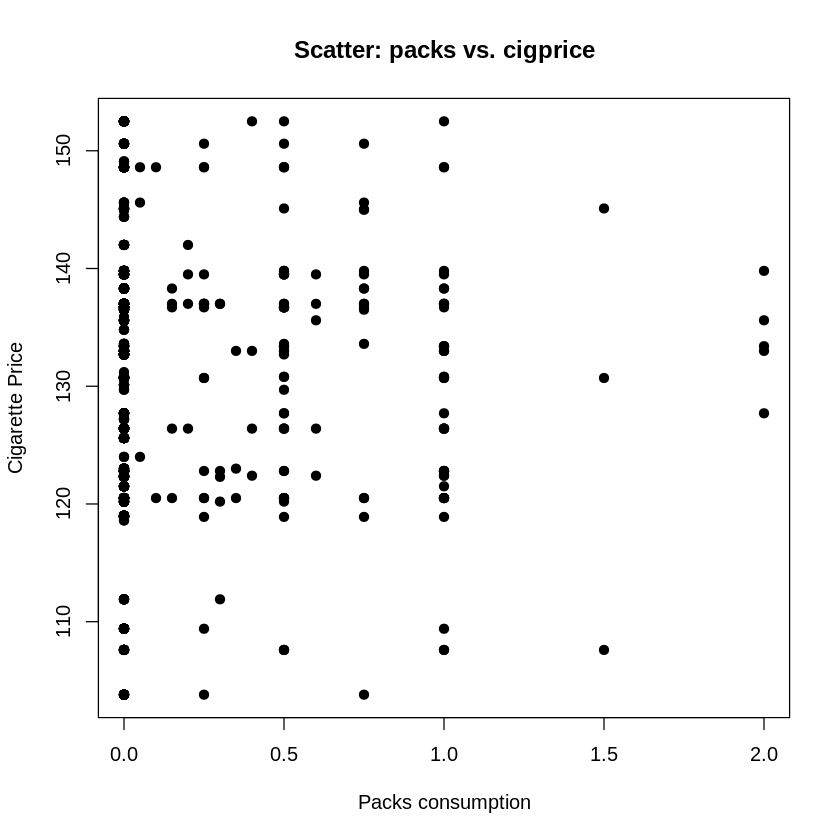

In [0]:
plot_scatter(iv_data, "packs", "cigprice",
             col1_label="Packs consumption",
             col2_label = "Cigarette Price")

In [0]:
# Explicitar el tipo de columnas
factor_cols <- c("male", "white")
# rest are quantitative
quantitative_cols <- names(iv_data)[!names(iv_data) %in% factor_cols] 
target_col = "lbwght"

cat(factor_cols, quantitative_cols)

male white cigtax cigprice fatheduc motheduc parity lbwght packs lfaminc

In [0]:
# Transformo en factores a las columnas relevantes. 
iv_data$male <- factor(iv_data$male,
                    levels = c(0,1),
                    labels = c("female", "male"))

iv_data$white <- factor(iv_data$white,
                      levels = c(0,1),
                      labels = c("non-white", "white"))

Miramos la relacion entre las variables explicativas y la var dependiente. 

En primer lugar analizamos el peso al nacero, pero separado por cada factor para las variables de `male` y `white`. Vemos que no parecen haber grandes diferencias en los niveles de los factores i.e. ,  mirando cada gráfico debajo por separado, notamos que la variabilidad de la variable de respuesta se ve modificada  cuando comparamos sus valores dentro de cada nivel del factor, sin embargo la mediana comparative no parece afectarse demasiado, así como tampoco sus cuartiles altos. 

Es importante notar que a partir de estos graficos no se puede concluir que estas variables no pueden aportar información al modelo, si se utilizan como variables de control.

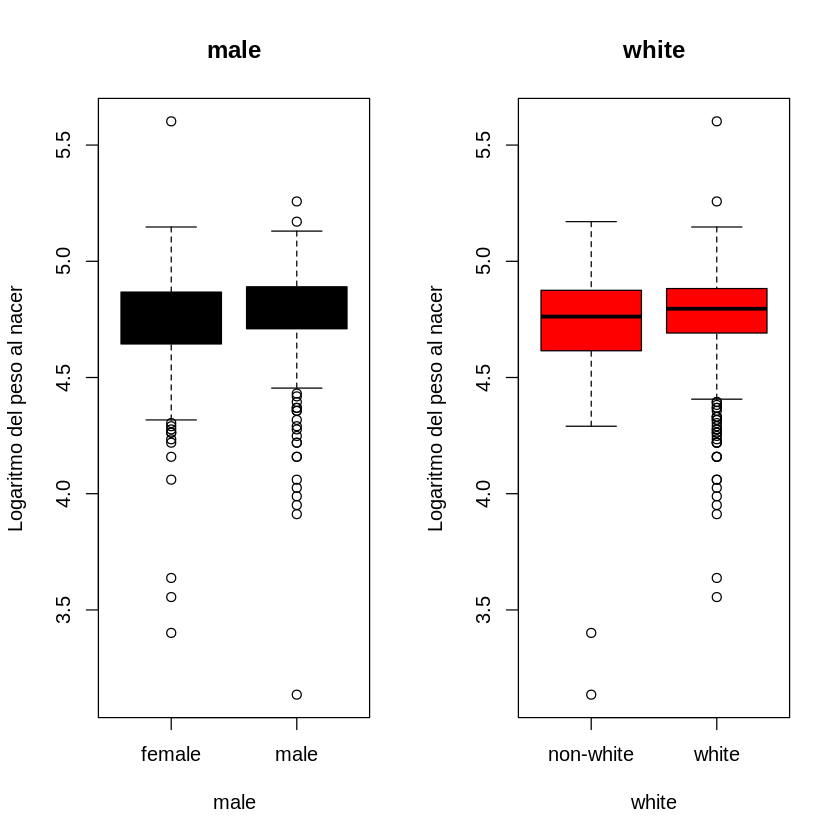

In [0]:
layout(matrix(1:2, nrow = 1,ncol = 2))

for (i in seq_along(factor_cols)){
  col = factor_cols[i]
  plot(iv_data[, col], iv_data[[ target_col]], 
       ylab="Logaritmo del peso al nacer",
       xlab=col,
       main = names(iv_data[col]), 
       col=i
      )
}

In [0]:
# estandarizamos las variables cuantitativas
for(col in quantitative_cols){
  col_std = sprintf("%s_std", col)
  iv_data[,col_std] <- scale(iv_data[,col])
}

cols <- colnames(iv_data)
std_cols <- cols[grepl("_std$", cols)]


## Matriz de correlaciones

Como era de esperar, vemos que existe una correlación negativa entre las variables de `packs` y la variable explicativa, mientras que el resto de las variables están correlacionadas positivamente. 

Obviamente era de esperar que haya tanta correlación positiva entre el precio de los cigarrillos y los impuestos, y que tal vez no debamos utilizar las dos variables en el modelo, para no romper supuestos de multi-colinealidad.

In [0]:
round(cor(iv_data[, std_cols] ), 2) 

,cigtax_std,cigprice_std,fatheduc_std,motheduc_std,parity_std,lbwght_std,packs_std,lfaminc_std
cigtax_std,1.00,0.88,0.08,0.05,0.01,0.04,0.02,0.03
cigprice_std,0.88,1.00,0.09,0.06,-0.01,0.04,0.01,0.11
fatheduc_std,0.08,0.09,1.00,0.64,-0.05,0.07,-0.18,0.41
motheduc_std,0.05,0.06,0.64,1.00,-0.10,0.04,-0.22,0.40
parity_std,0.01,-0.01,-0.05,-0.10,1.00,0.07,0.04,-0.06
lbwght_std,0.04,0.04,0.07,0.04,0.07,1.00,-0.15,0.08
packs_std,0.02,0.01,-0.18,-0.22,0.04,-0.15,1.00,-0.15
lfaminc_std,0.03,0.11,0.41,0.40,-0.06,0.08,-0.15,1.00


## Matriz de dispersión
A su vez cuando miramos las matrices de dispersión entre las variables cuantitativas,  se manifiesta que no existen correlaciones 
no encontramos que estas correlaciones

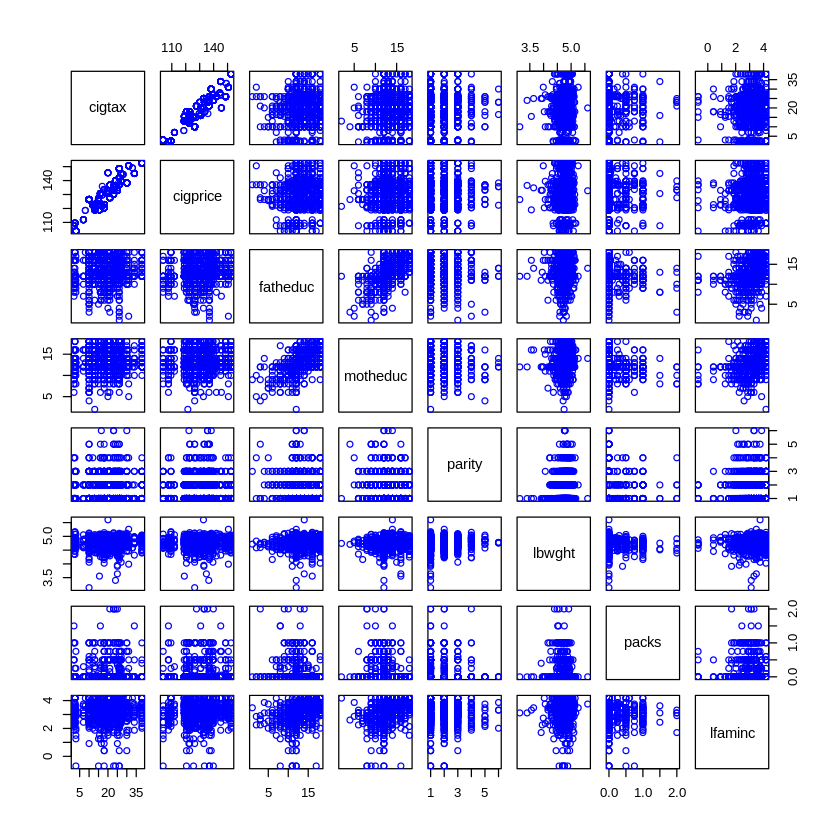

In [0]:
pairs(iv_data[, quantitative_cols] , col="blue")# sin las variables cualitativas)!

# 2 - Modelos MCO

```
Plantee un modelo que tenga como variable dependiente el logaritmo del peso al nacer y como variable explicativa la cantidad de paquetes de cigarrillos consumidos diariamente durante el embarazo. 

Estime este modelo con el método de mínimos cuadrados ordinarios (MCO). Luego expanda este modelo incorporando como controles las variables sexo, orden de nacimiento, logaritmo del ingreso familiar. Estime este segundo modelo usando el mismo método. Comente los resultados.
````

# Respuesta 2 

Primero ajustamos un modelo lineal por cuadrados mínimos del peso al nacer en función de la cantidad de paquetes por día consumidos por la madre durante el embarazo.

In [0]:
modelo1 = lm(iv_data$lbwght ~ iv_data$packs)

Estudiamos los coeficientes obtenidos, su significación estadística junto con una medida general del modelo a partir de los resultados de la tabla siguiente:

In [0]:
summary(modelo1)


Call:
lm(formula = iv_data$lbwght ~ iv_data$packs)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64156 -0.08571  0.02168  0.11655  0.82506 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.777055   0.005674 841.946  < 2e-16 ***
iv_data$packs -0.107613   0.020167  -5.336 1.14e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1859 on 1189 degrees of freedom
Multiple R-squared:  0.02339,	Adjusted R-squared:  0.02257 
F-statistic: 28.47 on 1 and 1189 DF,  p-value: 1.136e-07


Vemos que la variable explicativa propuesta es relevante para explicar el peso del bebé al nacer ya que el coeficiente estimado es estadísticamente significativo. Sin embargo, analizando el coeficiente R cuadrado vemos que su valor es bajo.

Si graficamos ambas variables en un gráfico de dispersión junto con la recta obtenida mediante el ajuste lineal :

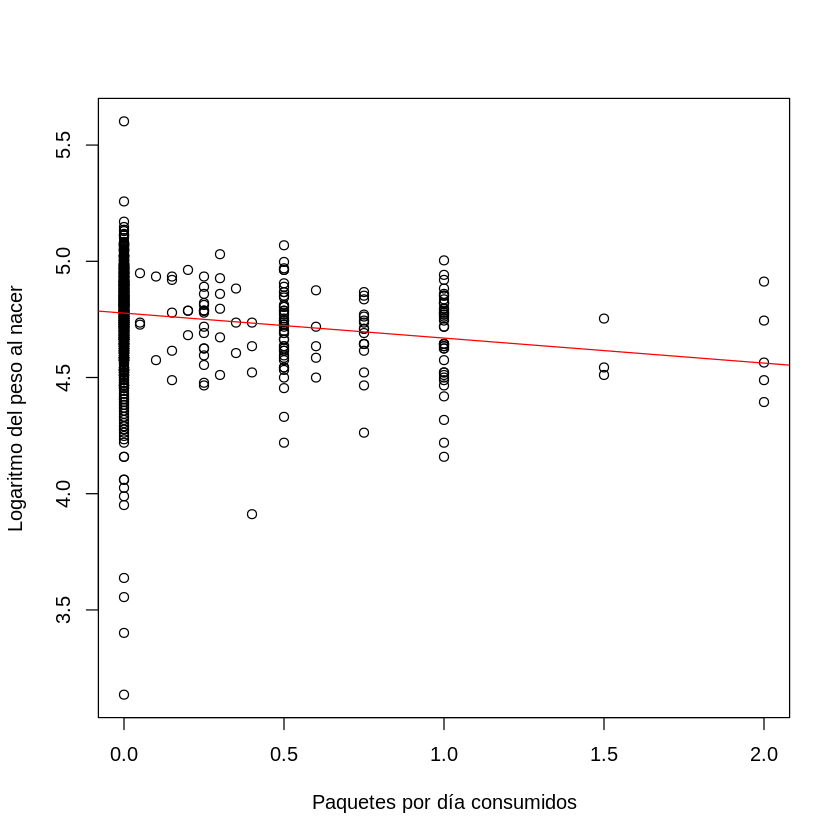

In [0]:
plot(iv_data$packs, iv_data$lbwght, 
     xlab = "Paquetes por día consumidos", ylab = "Logaritmo del peso al nacer")
abline(modelo1$coefficients, col="red")

Vemos que los residuos en este modelo dependen claramente de la variable explicativa, lo que nos da que la variable explicativa es endógena. Esto nos dice que estamos rompiendo con las hipotesis minimas del modelo lineal en este modelo. También que estamos omitiendo variables explicativas para el modelo.

Luego intentamos explicar la misma variable de interés, agregando el resto de las variables sugeridas

In [0]:
modelo2 = lm(iv_data$lbwght ~ iv_data$packs + iv_data$male + iv_data$lfaminc + iv_data$parity)
summary(modelo2)


Call:
lm(formula = iv_data$lbwght ~ iv_data$packs + iv_data$male + 
    iv_data$lfaminc + iv_data$parity)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64412 -0.08719  0.01969  0.11635  0.84542 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.675088   0.028959 161.437  < 2e-16 ***
iv_data$packs    -0.101184   0.020263  -4.994 6.82e-07 ***
iv_data$malemale  0.033891   0.010733   3.158  0.00163 ** 
iv_data$lfaminc   0.017265   0.007587   2.276  0.02305 *  
iv_data$parity    0.016878   0.006130   2.753  0.00599 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1845 on 1186 degrees of freedom
Multiple R-squared:  0.04028,	Adjusted R-squared:  0.03704 
F-statistic: 12.44 on 4 and 1186 DF,  p-value: 6.422e-10


Obtenemos nuevamente que las variables explicativas son relevantes y el coeficiente R cuadrado aumenta en este caso. Sin embargo, sigue siendo bajo como para explicar la variabilidad de los datos.

# 3 - Correlaciones con los residuos

```
Indique razones por las que la variable packs podría estar correlacionada con el término de error en el segundo modelo. 

¿Cómo afectaría esto a las estimaciones obtenidas?
````

# Respuesta 3
Podría estar correlacionada con otros factores del cuidado de la salud de la madre como, por ejemplo, estrés sufrido durante el embarazo. Esta correlación afectaría las estimaciones al no estar garantizada la consistencia. 


## Revisar esto
**Si fumas mucho, compras muchos packs, tenes mucha plata, tu pibe nace gordo algo asi no?**


# 4 - $cigprice$ como insrumento?

```
¿Será el precio de los paquetes de cigarrillos (cigprice) un posible instrumento parala variablepacks? ¿Qué razones podrían esgrimirse a favor y en contra?
```

# Respuesta 4

El instrumento debe ser exógeno y correlacionado con la variable endógena. Como punto a favor, el precio de cada paquete está correlacionado con la cantidad de paquetes consumidos. Un factor en contra podría ser la posible correlación del precio de los cigarrillos con proteccionismo del estado debido a la importancia de los impuestos en el precio de este producto en particular entendidos como política pública.


### Hay que hacer un test aca para ver que no esten correlacionados con `y`?




In [0]:
dp <- ggplot(iv_data, aes(packs, cigprice, colour=lbwght)) + geom_point()
 ggplotly(p)
p

# 5 - $cigprice$:control vs instrumento

```
¿Por qué incluiría esta variable como instrumento y no como un control adicional en la regresión? 

Es decir, en términos generales, ¿cuándo una variable debe incluirse como control y cuándo como instrumento?
```

# Respuesta 5

Debido a la pregunta que motiva el estudio. Cuando el investigador está interesado en estudiar el efecto de cierta variable endógena A en la variable respuesta B se considerará a A como una variable control y se buscarán variables instrumentales para garantizar la consistencia del modelo. Por el contrario, en caso de no tener interés en una variable A que sea exógena, esta se utilizará como variable instrumental. 


# 6 - IV con $MC2E$ 

```
Estime el segundo modelo usando el método de mínimos cuadrados en dos etapas(MC2E) concigpricecomo instrumento. Compare esta estimación con la hecha usando el método MCO.
```

# Respuesta 6

Al comparar los resultados obtenidos con y sin la variable instrumental cigprice encontramos una gran diferencia el efecto de cantidad de packs sobre el peso del recién nacido. Es cambio es tal que hay un cambio de signo en el coeficiente estimado y este deja de ser estadísticamente significativo.  

In [0]:
ivfit <- ivreg(lbwght ~ packs + male + lfaminc + parity| cigprice + male + lfaminc + parity, data = iv_datos)

summary(ivfit, df = Inf , diagnostics = TRUE)

ERROR: ignored

In [0]:
Implemente el método MC2E paso a paso. ¿Qué regresores ha incluido en la primeraetapa? ¿Sólocigpriceo también los controles del modelo a estimar? ¿Por qué? ¿Quéocurriría si lo hiciera de otro modo? Tras estimar los parámetros de la segunda etapa,¿obtuvo las mismas estimaciones de coeficientes y errores estándar que en el punto6?

# 7 -  Step MC2E

Implemente el método MC2E paso a paso. 

¿Qué regresores ha incluido en la primera etapa? ¿Sólo cigprice o también los controles del modelo a estimar? ¿Por qué? ¿Qué ocurriría si lo hiciera de otro modo? Tras estimar los parámetros de la segunda etapa, ¿obtuvo las mismas estimaciones de coeficientes y errores estándar que en el punto 6?

# Respuesta 7

In [0]:
reg1 <- lm(packs ~ cigprice + male + lfaminc + parity, data = iv_datos)

reg2 <- lm(lbwght ~ reg1$fitted.values + male + lfaminc + parity, data = iv_datos)

summary(reg2)

#8 - F-Test en MC2E

A la luz de lo desarrollado en el punto 7, ¿qué podría decir sobre la validez de lo hallado en el punto 6? ¿Qué valor toma el estadístico F de la regresión primera etapa?¿Es este el estadístico relevante para estudiar instrumentos débiles? Considere la frase “Es comúnmente aceptado que si el estadístico F de la primera etapa es mayor a 10, podemos estar tranquilos al asumir que no estamos ante instrumentos débiles”. ¿Escorrecta esta afirmación? ¿Cómo debe usarse la estimación de la primera etapa paraanalizar la posibilidad de que el instrumento sea débil?

# Respuesta 8

El estadístico F sirve como base para compara la hipotesis nula de que el modelo es mejor que el modelo "trivial" (solo intercepto) y no da información acerca de si hay correlaciones entre los regresores y los residuos.


### Falta responder mas aca

# Respuesta 9

# 9 - `cigtax` como instrumento?

Ahora considere el impuesto al cigarrillo (`cigtax`), ¿qué razones hay para pensar que podría usarse esta variable como instrumento? Estime el segundo modelo del punto 2 empleando `cigprice` y `cigtax` como instrumentos, usando `GMM` (tanto con matriz de  ponderadores robusta como no robusta a heterocedasticidad) y con el método `MC2E`. 

Interprete y compare los resultados. ¿Se obtienen las mismas estimaciones delos coeficientes y de los errores estándar?

In [0]:
GMM1 = gmm(lbwght ~ packs + male + lfaminc + parity, ~ cigprice + cigtax + male + lfaminc + parity , data = iv_datos, type = "twoStep",vcov = "iid")
summary(GMM1)

GMM2 = gmm(lbwght ~ packs + male + lfaminc + parity, ~ cigprice + cigtax + male + lfaminc + parity , data = iv_datos, type = "twoStep",vcov = "HAC")
summary(GMM2)

ivfit <- ivreg(lbwght ~ packs + male + lfaminc + parity| cigprice + cigtax + male + lfaminc + parity, data = iv_datos)
summary(ivfit)

# 10 - Test de sobre-identificación
Aplique el test de sobre-identificación para el caso de estos dos instrumentos, basado en la estimación de GMM robusta.

¿Qué resultados obtiene? ¿Qué conclusión puedesacar en base a los resultados de este test?



# Respuesta 10

# 11 - Instrumentos débiiles

Estudie la posibilidad de instrumentos débiles en el modelo sobre identificado

# Respuesta 11